In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/Dataset/car_evaluation.csv")
data.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [ ]:
data.columns=['buying price','maintenance cost','number of doors','number of persons','lug_boot','safety','decision']
data.head()

,buying price,maintenance cost,number of doors,number of persons,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   buying price       1727 non-null   object
 1   maintenance cost   1727 non-null   object
 2   number of doors    1727 non-null   object
 3   number of persons  1727 non-null   object
 4   lug_boot           1727 non-null   object
 5   safety             1727 non-null   object
 6   decision           1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
print(data['buying price'].unique())
print(data['maintenance cost'].unique())
print(data['number of doors'].unique())
print(data['number of persons'].unique())
print(data['lug_boot'].unique())
print(data['safety'].unique())
print(data['decision'].unique())

['vhigh' 'high' 'med' 'low']
['vhigh' 'high' 'med' 'low']
['2' '3' '4' '5more']
['2' '4' 'more']
['small' 'med' 'big']
['med' 'high' 'low']
['unacc' 'acc' 'vgood' 'good']


In [ ]:
data['buying price']=data['buying price'].replace({
    'vhigh':4,
    'high':3,
    'med':2,
    'low':1
})
data['maintenance cost']=data['maintenance cost'].replace({
    'vhigh':4,
    'high':3,
    'med':2,
    'low':1
})
data['number of doors']=data['number of doors'].replace({
    '2':2,
    '3':3,
    '4':4,
    '5more':5
})
data['number of persons']=data['number of persons'].replace({
    '2':2,
    '4':4,
    'more':5
})
data['lug_boot']=data['lug_boot'].replace({
    'small':1,
    'med':2,
    'big':3
})
data['safety'].replace(['med','high','low'],[2,3,1],inplace=True)


<ipython-input-9-b63e6f9a23f3>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['buying price']=data['buying price'].replace({
<ipython-input-9-b63e6f9a23f3>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['maintenance cost']=data['maintenance cost'].replace({
<ipython-input-9-b63e6f9a23f3>:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
data['decision']=labelencoder.fit_transform(data['decision'])
data

,buying price,maintenance cost,number of doors,number of persons,lug_boot,safety,decision
0,4,4,2,2,1,2,2
1,4,4,2,2,1,3,2
2,4,4,2,2,2,1,2
3,4,4,2,2,2,2,2
4,4,4,2,2,2,3,2
...,...,...,...,...,...,...,...
1722,1,1,5,5,2,2,1
1723,1,1,5,5,2,3,3
1724,1,1,5,5,3,1,2
1725,1,1,5,5,3,2,1


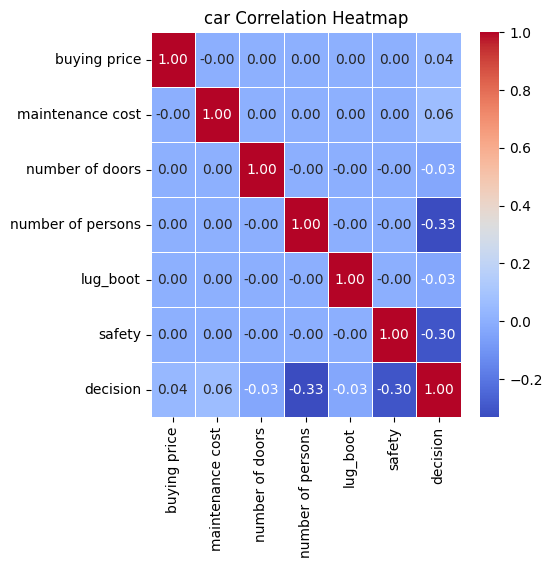

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
car_corr=data.corr()
plt.figure(figsize=(5, 5))
sns.heatmap(car_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('car Correlation Heatmap')
plt.show()

In [ ]:
y=data[['decision']]
x=data.drop(['decision'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y)
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(xtrain,ytrain)
model.predict(xtest)
model.score(xtest,ytest)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.9953703703703703

In [ ]:
ypred=model.predict(xtest)
ypred

array([0, 2, 2, 2, 3, 1, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 3, 1, 0, 2, 0,
       0, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 1, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 3, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2,
       0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 1, 1, 1, 1, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0,
       1, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 3, 1, 2, 2, 0, 2, 0, 0, 1, 0, 2, 2, 2, 2,
       3, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 1, 2, 0,

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ypred,ytest)
cm

array([[ 88,   0,   1,   0],
       [  0,  21,   0,   0],
       [  0,   0, 311,   0],
       [  0,   1,   0,  10]])

<Axes: >

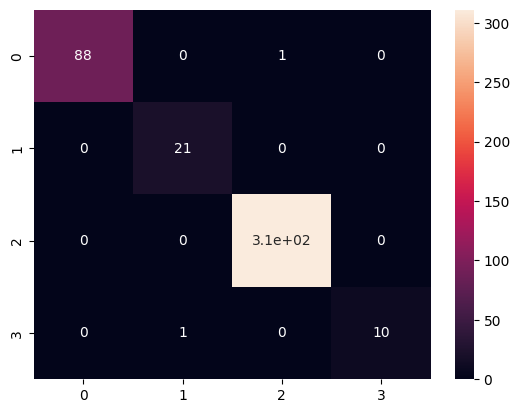

In [ ]:
import seaborn as sns
sns.heatmap(cm,annot=True)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        88
           1       1.00      0.95      0.98        22
           2       1.00      1.00      1.00       312
           3       0.91      1.00      0.95        10

    accuracy                           1.00       432
   macro avg       0.97      0.99      0.98       432
weighted avg       1.00      1.00      1.00       432



In [ ]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
df=pd.DataFrame()
df['buying price']=l.fit_transform(data['buying price'])
df['maintenance cost']=l.fit_transform(data['maintenance cost'])
df['number of doors']=l.fit_transform(data['number of doors'])
df['number of persons']=l.fit_transform(data['number of persons'])
df['lug_boot']=l.fit_transform(data['lug_boot'])
df['safety']=l.fit_transform(data['safety'])
df['decision']=l.fit_transform(data['decision'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   buying price       1727 non-null   int64
 1   maintenance cost   1727 non-null   int64
 2   number of doors    1727 non-null   int64
 3   number of persons  1727 non-null   int64
 4   lug_boot           1727 non-null   int64
 5   safety             1727 non-null   int64
 6   decision           1727 non-null   int64
dtypes: int64(7)
memory usage: 94.6 KB


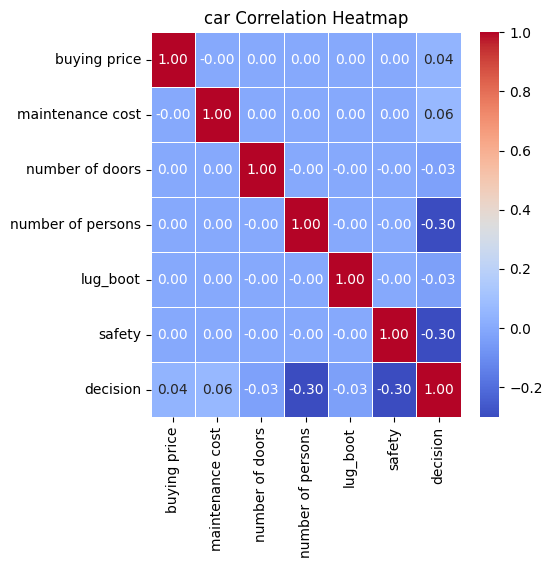

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
car_corr=df.corr()
plt.figure(figsize=(5, 5))
sns.heatmap(car_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('car Correlation Heatmap')
plt.show()